<a href="https://colab.research.google.com/github/Dominic-George/Web-scraping/blob/main/Final_webscrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

In [ ]:
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url)
page.content

# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

# **Getting movie urls**

In [ ]:
# Here am trying to get all the urls of the website
base_url = "https://www.justwatch.com"

# Finding all div tags with data-testid=titleItem and class=title-list-grid__item
movie_divs = soup.find_all("div", {"data-testid": "titleItem", "class": "title-list-grid__item"})

# Storing the links in a list
movie_links = [base_url + div.a['href'] for div in movie_divs]

# Limiting the list to 60 URLs as you mentioned atleast 50 so ...
movie_links = movie_links[:60]

# Printing the links
print(movie_links)


['https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film', 'https://www.justwatch.com/in/movie/hanu-man', 'https://www.justwatch.com/in/movie/premalu', 'https://www.justwatch.com/in/movie/oppenheimer', 'https://www.justwatch.com/in/movie/anatomie-dune-chute', 'https://www.justwatch.com/in/movie/fighter-2022', 'https://www.justwatch.com/in/movie/article-370', 'https://www.justwatch.com/in/movie/dune-part-two', 'https://www.justwatch.com/in/movie/the-crew-2024', 'https://www.justwatch.com/in/movie/manjummel-boys', 'https://www.justwatch.com/in/movie/animal-2022', 'https://www.justwatch.com/in/movie/anyone-but-you', 'https://www.justwatch.com/in/movie/dune-2021', 'https://www.justwatch.com/in/movie/12th-fail', 'https://www.justwatch.com/in/movie/bramayugam', 'https://www.justwatch.com/in/movie/poor-things', 'https://www.justwatch.com/in/movie/road-house-2024', 'https://www.justwatch.com/in/movie/amar-singh-chamkila', 'https://www.justwatch.com/in/movie/godzilla-x-kong-

# **getting movie names**

In [ ]:
# Find all div tags with class 'title-list-grid__item'
title_divs = soup.find_all('div', class_='title-list-grid__item')

# Extract movie titles from the 'data-title' attribute of each div
movie_names = [div['data-title'] for div in title_divs]

# Limiting the list to 60 movie names
movie_names = movie_names[:60]

# Print the movie names
for name in movie_names:
    print(name)


Teri Baaton Mein Aisa Uljha Jiya
Hanu-Man
Premalu
Oppenheimer
Anatomy of a Fall
Fighter
Article 370
Dune: Part Two
Crew
Manjummel Boys
Animal
Anyone But You
Dune
12th Fail
Bramayugam
Poor Things
Road House
Amar Singh Chamkila
Godzilla x Kong: The New Empire
Shaitaan
Laapataa Ladies
Sam Bahadur
Gaami
Kung Fu Panda
Madame Web
Salaar
Kung Fu Panda 4
365 Days
Madgaon Express
Merry Christmas
Lover
Godzilla vs. Kong
Aattam
The Goat Life
Ferrari
Murder Mubarak
DJ Tillu
Aquaman and the Lost Kingdom
Eagle
The Beekeeper
Joker
The Kerala Story
Abraham Ozler
Om Bheem Bush
Harry Potter and the Philosopher's Stone
Chaari 111
Kampon
She Said
Migration
Bade Miyan Chote Miyan
Godzilla Minus One
The Holdovers
Joram
Anweshippin Kandethum
Zara Hatke Zara Bachke
Argylle
777 Charlie
Dunki
Por
Scoop


# **Getting release year**

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import random

def scrape_release_year(url):
    # Sending a GET request to the URL
    response = requests.get(url)

    # Parsing the HTML content
    soup = BeautifulSoup(response.content, "html.parser")

    # Finding the release year element
    release_year_tag = soup.find("span", class_="text-muted")

    # Extracting the release year
    if release_year_tag:
        release_year = release_year_tag.text.strip().replace("(", "").replace(")", "")
        return release_year
    else:
        return None

# Scraping and printing release years for each movie link
for link in movie_links:
    release_year = scrape_release_year(link)
    if release_year is None:
        print("None")
    else:
        print(release_year)

    # Adding a random delay between 1 and 3 seconds
    delay = random.uniform(1, 3)
    time.sleep(delay)



2024
2024
2024
2023
2023
2024
2024
2024
2024
2024
2023
2023
2021
2023
2024
2023
2024
2024
2024
2024
2024
2023
2024
2008
2024
2023
2024
2020
2024
2024
2024
2021
2024
2024
2023
2024
2022
2023
2024
2024
2019
2023
2024
2024
2001
2024
2023
2022
2023
2024
2023
2023
2023
2024
2023
2024
2022
2023
2024
2024


# **Getting genres**

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import time
import random

def scrap_genres(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    # Finding all div tags with class name 'detail-infos'
    detail_infos_tags = soup.find_all('div', class_='detail-infos')
    genres = []

    # Checking the second occurrence for genre information
    if len(detail_infos_tags) >= 2:
        second_detail_infos_tag = detail_infos_tags[1]
        # Finding the div tag with class name 'detail-infos__value' inside the second occurrence
        genres_tag = second_detail_infos_tag.find('div', class_='detail-infos__value')
        # If genre information is found, append it to the genres list
        if genres_tag:
            genres.append(genres_tag.text.strip())

    # Checking the third occurrence for genre information
    if len(detail_infos_tags) >= 3:
        third_detail_infos_tag = detail_infos_tags[2]
        # Finding the div tag with class name 'detail-infos__value' inside the third occurrence
        genres_tag = third_detail_infos_tag.find('div', class_='detail-infos__value')
        # If genre information is found, append it to the genres list
        if genres_tag:
            genres.append(genres_tag.text.strip())

    # If genre information is not found in either the second or third occurrence, return None
    if not genres:
        return None

    return ", ".join(genres)

for link in movie_links:
    genres = scrap_genres(link)
    if genres is None:
        print(link, 'None')
    else:
        # Removing ratings and runtime from each line using regular expressions
        genres_cleaned = re.sub(r'\d+\.\d+\s+\(\d+[kKmM]*\),?', '', genres)
        genres_cleaned = re.sub(r'\d+h\s+\d+min,?', '', genres_cleaned)
        # Removing any leading or trailing commas
        genres_cleaned = genres_cleaned.strip(',').strip()
        print(genres_cleaned)

    delay = random.uniform(1, 3)
    time.sleep(delay)

Science-Fiction, Comedy, Drama, Romance
Fantasy, Action & Adventure, Comedy, Science-Fiction
Comedy, Romance
Drama, History
Mystery & Thriller, Crime, Drama
Action & Adventure, Mystery & Thriller, War & Military
Action & Adventure, Drama, Mystery & Thriller
Science-Fiction, Drama, Action & Adventure,
Drama, Comedy,
Mystery & Thriller,
Crime, Drama, Action & Adventure, Mystery & Thriller
Comedy, Romance
Science-Fiction, Action & Adventure, Drama
Drama
Horror, Mystery & Thriller
Science-Fiction, Romance, Comedy, Drama
Action & Adventure, Mystery & Thriller
Drama, Music & Musical, Romance
Science-Fiction, Mystery & Thriller, Action & Adventure,
Horror, Mystery & Thriller, Drama,
Comedy, Drama, Action & Adventure,
Drama, War & Military, History
Mystery & Thriller, Science-Fiction, Fantasy, Drama
Animation, Kids & Family, Comedy, Action & Adventure, Fantasy,
Action & Adventure, Fantasy, Science-Fiction, Mystery & Thriller,
Crime, Drama, Mystery & Thriller, Action & Adventure
Kids & Family, 

# **Getting imdb rating**

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import random

def scrape_imdb_rating(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    # Finding all div tags with class name 'detail-infos'
    detail_infos_tags = soup.find_all('div', class_='detail-infos')
    imdb_ratings = []
    for detail_infos_tag in detail_infos_tags[:2]:  # Limit to the first 2 occurrences
        # Finding the div tag with class name 'detail-infos__value' inside the detail_infos_tag
        value_div = detail_infos_tag.find("div", class_="detail-infos__value")
        if value_div:
            # Finding all div tags with class name 'jw-scoring-listing__rating' inside the value_div
            rating_divs = value_div.find_all("div", class_="jw-scoring-listing__rating")
            # Checking if the second occurrence exists
            if len(rating_divs) >= 2:
                # Geting the second occurrence
                second_rating_div = rating_divs[1]
                # Finding the span tag within the second_rating_div
                imdb_rating_tag = second_rating_div.find("span")
                if imdb_rating_tag:
                    # Extracting the text from the span tag
                    imdb_rating = imdb_rating_tag.text.strip()
                    imdb_ratings.append(imdb_rating)
    return imdb_ratings if imdb_ratings else None

for link in movie_links:
    imdb_ratings = scrape_imdb_rating(link)
    if imdb_ratings is None:
        print("None")
    else:
        for rating in imdb_ratings:
            print(rating)

    # Adding a random delay between 1 and 3 seconds
    delay = random.uniform(1, 3)
    time.sleep(delay)

6.5  (47k)
7.9  (22k)
8.0  (6k)
8.3  (722k)
7.7  (117k)
6.3  (43k)
8.2  (12k)
8.7  (359k)
7.6  (24k)
8.7  (6k)
6.2  (88k)
6.2  (66k)
8.0  (850k)
9.0  (110k)
8.0  (7k)
7.9  (244k)
6.2  (105k)
8.1  (7k)
6.5  (36k)
7.7  (35k)
8.4  (2k)
7.8  (15k)
6.6  (1k)
7.6  (521k)
3.8  (53k)
6.5  (63k)
6.4  (29k)
3.3  (98k)
8.3  (27k)
7.0  (25k)
7.0  (1k)
6.3  (240k)
8.3  (2k)
8.7  (5k)
6.5  (41k)
6.4  (48k)
7.2  (3k)
5.6  (81k)
6.4  (4k)
6.4  (81k)
8.4  (1m)
7.0  (71k)
6.6  (2k)
5.8
7.6  (853k)
5.2
4.7
7.3  (38k)
6.7  (23k)
7.5  (29k)
8.3  (48k)
7.9  (136k)
6.7  (2k)
7.5  (6k)
6.8  (14k)
5.7  (59k)
8.7  (39k)
6.7  (72k)
5.1
6.6  (11k)


# **Getting runtime**

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import random

def scrap_runtime(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    # Finding the title-info section
    title_info = soup.find('div', class_='title-info')
    if title_info:
        # Finding all div tags with class 'detail-infos' inside title-info
        detail_infos = title_info.find_all('div', class_='detail-infos')
        for i in range(min(len(detail_infos), 4)):
            # Getting the i-th detail-infos div and then finding the div with class 'detail-infos__value'
            runtime_tag = detail_infos[i].find('div', class_='detail-infos__value')
            if runtime_tag:
                runtime_text = runtime_tag.text.strip()
                # Checking if the runtime_text contains 'min' (assuming it's in minutes)
                if 'min' in runtime_text:
                    return runtime_text
    return None

for link in movie_links:
    runtime = scrap_runtime(link)
    if runtime is None:
        print('None')
    else:
        print(runtime)

    delay = random.uniform(1, 3)
    time.sleep(delay)

2h 21min
2h 39min
2h 36min
3h 0min
2h 32min
2h 47min
2h 38min
2h 46min
1h 58min
2h 15min
3h 21min
1h 43min
2h 35min
2h 27min
2h 19min
2h 22min
2h 1min
2h 25min
1h 55min
2h 10min
2h 2min
2h 30min
2h 27min
1h 30min
1h 56min
2h 55min
1h 34min
1h 54min
2h 23min
2h 23min
2h 25min
1h 53min
2h 19min
2h 52min
2h 11min
2h 22min
2h 1min
2h 4min
2h 39min
1h 45min
2h 2min
2h 18min
2h 23min
2h 30min
2h 27min
2h 7min
1h 31min
2h 9min
1h 23min
2h 44min
2h 5min
2h 13min
1h 57min
2h 22min
2h 20min
2h 19min
2h 46min
2h 40min
2h 34min
1h 43min


# **Getting age rating**

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import random

def scrape_age_rating(url):
    # Sending a GET request to the URL
    response = requests.get(url)

    # Parsing the HTML content
    soup = BeautifulSoup(response.content, "html.parser")

    # Finding all div elements with class 'detail-infos'
    detail_infos_divs = soup.find_all("div", class_="detail-infos")

    # Searching for the div containing the 'Age rating' tag
    for detail_div in detail_infos_divs:
        subheading_tag = detail_div.find("h3", class_="detail-infos__subheading")
        if subheading_tag and subheading_tag.text.strip() == "Age rating":
            # If 'Age rating' is found, extract the value
            age_rating_div = detail_div.find("div", class_="detail-infos__value")
            if age_rating_div:
                return age_rating_div.text.strip()
    return None

# Scraping and print age ratings for each movie link
for link in movie_links:
    age_rating = scrape_age_rating(link)
    if age_rating is None:
        print("None")
    else:
        print(age_rating)

    # Adding a random delay between 1 and 3 seconds
    delay = random.uniform(1, 3)
    time.sleep(delay)

None
UA
U
UA
None
UA
UA
None
UA
UA
A
A
UA
None
UA
A
None
None
UA
UA
None
UA
A
U
None
A
None
None
UA
None
None
UA
UA
UA
None
None
UA
None
UA
None
A
A
None
None
U
None
A
A
U
UA
None
None
UA
UA
UA
None
UA
UA
None
None


# **Getting production country**

In [ ]:
# Write Your Code here
import requests
from bs4 import BeautifulSoup
import time
import random

def scrape_production_country(url):
    # Sending a GET request to the URL
    response = requests.get(url)

    # Parsing the HTML content
    soup = BeautifulSoup(response.content, "html.parser")

    # Finding all div elements with class 'detail-infos'
    detail_infos_divs = soup.find_all("div", class_="detail-infos")

    # Searching for the div containing the 'Production country' tag
    for detail_div in detail_infos_divs:
        subheading_tag = detail_div.find("h3", class_="detail-infos__subheading")
        if subheading_tag and subheading_tag.text.strip() == "Production country":
            # If 'Production country' is found, extract the value
            country_div = detail_div.find("div", class_="detail-infos__value")
            if country_div:
                return country_div.text.strip()
    return None

# Scraping and print production country details for each movie link
for link in movie_links:
    production_country = scrape_production_country(link)
    if production_country is None:
        print("Production country not found")
    else:
        print(production_country)

    # Adding a random delay between 1 and 3 seconds
    delay = random.uniform(1, 3)
    time.sleep(delay)

India
India
India
United States, United Kingdom
France
India
India
United States
India
India
India
Australia, United States
United States
India
India
Ireland, United Kingdom, United States
United States
India
Australia, United States
India
India
India
India
United States
United States
India
United States
Poland
India
India
India
United States
India
United States, India
United States, United Kingdom
India
India
United States
India
United Kingdom, United States
Canada, United States
India
India
India
United Kingdom, United States
India
Philippines
United States, Japan
United States
India
Japan
United States
India
India
India
United Kingdom, United States
India
India
India
United Kingdom


# **Getting streaming details**

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import random

def scrape_streaming_details(url):
    # Sending a GET request to the URL
    response = requests.get(url)

    # Parsing the HTML content
    soup = BeautifulSoup(response.content, "html.parser")

    # Finding the div with class 'buybox-row__offers'
    buybox_div = soup.find("div", class_="buybox-row__offers")

    # Initialize a list to store streaming details
    streaming_details = []

    # Checking if buybox_div exists
    if buybox_div:
        # Finding all picture tags within buybox_div
        picture_tags = buybox_div.find_all("picture", class_="picture-wrapper")

        # Extracting the alt value from each img tag
        for picture_tag in picture_tags:
            img_tag = picture_tag.find("img")
            if img_tag and img_tag.has_attr("alt"):
                streaming_details.append(img_tag["alt"])

    return streaming_details

# Scraping and printing streaming details for each movie link
for link in movie_links:
    streaming_details = scrape_streaming_details(link)
    if not streaming_details:
        print("No streaming details found")
    else:
        for detail in streaming_details:
            print(detail)

    # Add a random delay between 1 and 3 seconds
    delay = random.uniform(1, 3)
    time.sleep(delay)

Amazon Prime Video
Hotstar
Jio Cinema
Zee5
Hotstar
aha
Apple TV
Amazon Prime Video
Netflix
Netflix
Apple TV
Bookmyshow
Bookmyshow
Netflix
Apple TV
Apple TV
Hotstar
Sony Liv
Apple TV
Amazon Prime Video
Netflix
Bookmyshow
No streaming details found
Bookmyshow
Zee5
Zee5
Apple TV
Apple TV
Netflix
Hotstar
Bookmyshow
Netflix
No streaming details found
Netflix
Hotstar
Amazon Prime Video
Amazon Prime Video
No streaming details found
Amazon Prime Video
Netflix
Sony Liv
aha
Apple TV
Amazon Prime Video
Lionsgate Play
Amazon Prime Video
Zee5
Hotstar
Amazon Prime Video
Apple TV
Amazon Prime Video
Netflix
Apple TV
Apple TV
Bookmyshow
No streaming details found
Apple TV
Amazon Prime Video
Netflix
No streaming details found
Apple TV Plus
Amazon Prime Video
Netflix
Netflix
Netflix


# **Creating movies data frame**

In [ ]:
import pandas as pd

# Lists to store scraped data
titles = []
release_years = []
genres = []
imdb_ratings = []
runtimes = []
age_ratings = []
production_countries = []
streaming_details = []

# Looping through the movie links and scrape details
for link in movie_links:
    # Scraping release year
    release_year = scrape_release_year(link)
    release_years.append(release_year)

    # Scraping genres
    genre = scrap_genres(link)
    genres.append(genre)

    # Scraping IMDb rating
    imdb_rating = scrape_imdb_rating(link)
    imdb_ratings.append(imdb_rating)

    # Scraping runtime
    runtime = scrap_runtime(link)
    runtimes.append(runtime)

    # Scraping age rating
    age_rating = scrape_age_rating(link)
    age_ratings.append(age_rating)

    # Scraping production country
    production_country = scrape_production_country(link)
    production_countries.append(production_country)

    # Scraping streaming details
    streaming_detail = scrape_streaming_details(link)
    streaming_details.append(streaming_detail)

# Creating a DataFrame
movies_df = pd.DataFrame({
    "Title": movie_names,
    "Release Year": release_years,
    "Genres": genres,
    "IMDb Rating": imdb_ratings,
    "Runtime": runtimes,
    "Age Rating": age_ratings,
    "Production Country": production_countries,
    "Streaming Details": streaming_details
})

# Display the DataFrame
#print(movies_df)
movies_df.head()

,Title,Release Year,Genres,IMDb Rating,Runtime,Age Rating,Production Country,Streaming Details
0,Teri Baaton Mein Aisa Uljha Jiya,2024,"6.5 (47k), Science-Fiction, Comedy, Drama, Ro...",[6.5 (47k)],2h 21min,None,India,[Amazon Prime Video]
1,Hanu-Man,2024,"7.9 (22k), Fantasy, Action & Adventure, Comed...",[7.9 (22k)],2h 39min,UA,India,"[Hotstar, Jio Cinema, Zee5]"
2,Premalu,2024,"8.0 (6k), Comedy, Romance",[8.0 (6k)],2h 36min,U,India,"[Hotstar, aha]"
3,Oppenheimer,2023,"8.3 (722k), Drama, History",[8.3 (722k)],3h 0min,UA,"United States, United Kingdom",[Apple TV]
4,Anatomy of a Fall,2023,"7.7 (117k), Mystery & Thriller, Crime, Drama",[7.7 (117k)],2h 32min,None,France,[Amazon Prime Video]


# **Scraping tv show data**

In [ ]:
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

# **Fetching tv shows urls**

In [ ]:
base_url = "https://www.justwatch.com"

# Finding all div tags with data-testid=titleItem and class=title-list-grid__item
tv_shows_divs = soup.find_all("div", {"data-testid": "titleItem", "class": "title-list-grid__item"})

# Storing the links in a list, considering only the first 60 TV shows
tv_shows_links = [base_url + div.a['href'] for div in tv_shows_divs[:60]]

# Printing the links
print(tv_shows_links)


['https://www.justwatch.com/in/tv-show/shogun-2024', 'https://www.justwatch.com/in/tv-show/3-body-problem', 'https://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.com/in/tv-show/fallout', 'https://www.justwatch.com/in/tv-show/panchayat', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/inspector-rishi', 'https://www.justwatch.com/in/tv-show/attack-on-titan', 'https://www.justwatch.com/in/tv-show/apharan', 'https://www.justwatch.com/in/tv-show/ripley', 'https://www.justwatch.com/in/tv-show/solo-leveling-2024', 'https://www.justwatch.com/in/tv-show/the-gentlemen', 'https://www.justwatch.com/in/tv-show/sunflower-2021', 'https://www.justwatch.com/in/tv-show/untitled-kapil-sharma-netflix-project', 'https://www.justwatch.com/in/tv-show/a-gentleman-in-moscow', 'https://www.justwatch.com/in/tv-show/maamla-legal-hai', 'https://www.justwatch.com/in/tv-show/young-sheldon', 'https://www.justwatch.com/in/tv-show/invincible', 'https://www

# **Fetching tv shows titles**

In [ ]:
tv_shows_divs = soup.find_all('div', class_='title-list-grid__item')

# Extract tv show titles from the 'data-title' attribute of each div, considering only the first 60 TV shows
tv_shows_titles = [div['data-title'] for div in tv_shows_divs[:60]]

# Print the tv show titles
for name in tv_shows_titles:
    print(name)


Shōgun
3 Body Problem
Mirzapur
Fallout
Panchayat
Game of Thrones
Inspector Rishi
Attack on Titan
Apharan
Ripley
Solo Leveling
The Gentlemen
Sunflower
The Great Indian Kapil Show
A Gentleman in Moscow
Maamla Legal Hai
Young Sheldon
Invincible
Farzi
Maharani
Queen of Tears
Mastram
Parasyte: The Grey
Jujutsu Kaisen
The Walking Dead
Lootere
True Detective
Halo
Gandii Baat
Avatar: The Last Airbender
Anthracite
Aashram
Scam 1992
Reacher
Naruto
The Family Man
Loki
Saving the Tigers
Testament: The Story of Moses
Yellowstone
The Rookie
Lucifer
Euphoria
Naruto Shippūden
Dehati Ladke
Gullak
Money Heist
Baby Reindeer
The Good Doctor
Peaky Blinders
House of the Dragon
X-Men '97
Dark Desire
The Freelancer
Breaking Bad
The Flash
Sugar
Modern Family
American Horror Story
Asur: Welcome to Your Dark Side


# **Fetching tv shows release year**

In [ ]:
# Write Your Code here
import requests
from bs4 import BeautifulSoup
import time
import random

def scrape_tv_show_release_year(url):
    # Send a GET request to the URL
    response = requests.get(url)

    # Parse the HTML content
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the release year element
    release_year_tag = soup.find("span", class_="text-muted")

    # Extract the release year
    if release_year_tag:
        release_year = release_year_tag.text.strip().replace("(", "").replace(")", "")
        return release_year
    else:
        return None

# Scrape and print release years for each tv_show_link
for link in tv_shows_links:
    release_year = scrape_tv_show_release_year(link)
    if release_year is None:
        print("None")
    else:
        print(release_year)

    # Add a random delay between 1 and 3 seconds
    delay = random.uniform(1, 3)
    time.sleep(delay)

2024
2024
2018
2024
2020
2011
2024
2013
2018
2024
2024
2024
2021
2024
2024
2024
2017
2021
2023
2021
2024
2020
2024
2020
2010
2024
2014
2022
2018
2024
2024
2020
2020
2022
2002
2019
2021
2023
2024
2018
2018
2016
2019
2007
2023
2019
2017
2024
2017
2013
2022
2024
2020
2023
2008
2014
2024
2009
2011
2020


# **Fetching tv shows genres**

In [ ]:
# Write Your Code here
import requests
from bs4 import BeautifulSoup
import re
import time
import random

def scrap_tv_show_genres(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    # Finding all div tags with class name 'detail-infos'
    detail_infos_tags = soup.find_all('div', class_='detail-infos')
    genres = []

    # Checking the second occurrence for genre information
    if len(detail_infos_tags) >= 2:
        second_detail_infos_tag = detail_infos_tags[1]
        # Finding the div tag with class name 'detail-infos__value' inside the second occurrence
        genres_tag = second_detail_infos_tag.find('div', class_='detail-infos__value')
        # If genre information is found, append it to the genres list
        if genres_tag:
            genres.append(genres_tag.text.strip())

    # Checking the third occurrence for genre information
    if len(detail_infos_tags) >= 3:
        third_detail_infos_tag = detail_infos_tags[2]
        # Finding the div tag with class name 'detail-infos__value' inside the third occurrence
        genres_tag = third_detail_infos_tag.find('div', class_='detail-infos__value')
        # If genre information is found, append it to the genres list
        if genres_tag:
            genres.append(genres_tag.text.strip())

    # If genre information is not found in either the second or third occurrence, return None
    if not genres:
        return None

    return ", ".join(genres)

for link in tv_shows_links:
    genres = scrap_tv_show_genres(link)
    if genres is None:
        print(link, 'None')
    else:
        # Removing ratings and runtime from each line using regular expressions
        genres_cleaned = re.sub(r'\d+\.\d+\s+\(\d+[kKmM]*\),?', '', genres)
        genres_cleaned = re.sub(r'\d+h\s+\d+min,?', '', genres_cleaned)
        # Removing any leading or trailing commas
        genres_cleaned = genres_cleaned.strip(',').strip()
        print(genres_cleaned)

    delay = random.uniform(1, 3)
    time.sleep(delay)

Drama, War & Military, History
Science-Fiction, Mystery & Thriller, Drama, Fantasy
Crime, Action & Adventure, Drama, Mystery & Thriller
Action & Adventure, Drama, Science-Fiction, War & Military, Comedy
Comedy, Drama
Action & Adventure, Drama, Fantasy, Science-Fiction
Horror, Action & Adventure, Drama, Mystery & Thriller
Fantasy, Horror, Animation, Action & Adventure, Drama, Science-Fiction, 25min
Drama, Action & Adventure, Crime, Mystery & Thriller
Crime, Drama, Mystery & Thriller
Animation, Action & Adventure, Fantasy, Science-Fiction
Action & Adventure, Comedy, Crime, Drama
Comedy, Crime
Comedy
Drama, History, Mystery & Thriller
Drama, Comedy
Comedy, Kids & Family
Action & Adventure, Drama, Animation, Science-Fiction, Fantasy, Mystery & Thriller
Crime, Drama, Mystery & Thriller
Drama
Drama, Kids & Family, Comedy
Drama, Comedy, Fantasy, 28min
Drama, Action & Adventure, Horror, Science-Fiction, Mystery & Thriller
Fantasy, Mystery & Thriller, Animation, Action & Adventure, Science-Fict

# **Fetching tv shows imbd rating**

In [ ]:
# Write Your Code here
import requests
from bs4 import BeautifulSoup
import time
import random

def scrape_tv_show_imdb_rating(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    # Finding all div tags with class name 'detail-infos'
    detail_infos_tags = soup.find_all('div', class_='detail-infos')
    imdb_ratings = []
    for detail_infos_tag in detail_infos_tags[:2]:  # Limit to the first 2 occurrences
        # Finding the div tag with class name 'detail-infos__value' inside the detail_infos_tag
        value_div = detail_infos_tag.find("div", class_="detail-infos__value")
        if value_div:
            # Finding all div tags with class name 'jw-scoring-listing__rating' inside the value_div
            rating_divs = value_div.find_all("div", class_="jw-scoring-listing__rating")
            # Checking if the second occurrence exists
            if len(rating_divs) >= 2:
                # Geting the second occurrence
                second_rating_div = rating_divs[1]
                # Finding the span tag within the second_rating_div
                imdb_rating_tag = second_rating_div.find("span")
                if imdb_rating_tag:
                    # Extracting the text from the span tag
                    imdb_rating = imdb_rating_tag.text.strip()
                    imdb_ratings.append(imdb_rating)
    return imdb_ratings if imdb_ratings else None

for link in tv_shows_links:
    imdb_ratings = scrape_tv_show_imdb_rating(link)
    if imdb_ratings is None:
        print("None")
    else:
        for rating in imdb_ratings:
            print(rating)

    # Adding a random delay between 1 and 3 seconds
    delay = random.uniform(1, 3)
    time.sleep(delay)

9.1  (71k)
7.6  (88k)
8.5  (81k)
8.6  (93k)
8.9  (84k)
9.2  (2m)
7.3  (1k)
9.0  (325k)
8.3  (19k)
8.2  (19k)
8.4  (18k)
8.1  (87k)
7.5  (23k)
7.3  (7k)
6.6  (2k)
8.1  (6k)
7.6  (101k)
8.7  (202k)
8.4  (45k)
7.9  (9k)
None
7.1  (2k)
7.2  (6k)
8.6  (113k)
8.1  (1m)
6.9
8.9  (655k)
7.3  (92k)
3.4  (2k)
7.2  (66k)
6.1  (1k)
7.4  (32k)
9.3  (150k)
8.1  (210k)
8.4  (127k)
8.7  (98k)
8.2  (410k)
8.1  (2k)
6.2  (2k)
8.7  (219k)
8.0  (71k)
8.1  (355k)
8.3  (241k)
8.7  (168k)
7.2
9.1  (21k)
8.2  (531k)
8.2  (16k)
8.0  (112k)
8.8  (648k)
8.4  (374k)
None
6.5  (9k)
8.1  (6k)
9.5  (2m)
7.5  (368k)
7.9  (4k)
8.5  (482k)
8.0  (343k)
8.5  (65k)


# **Fetching tv shows age rating**

In [ ]:
# Write Your Code here
import requests
from bs4 import BeautifulSoup
import time
import random

def scrape_tv_show_age_rating(url):
    # Sending a GET request to the URL
    response = requests.get(url)

    # Parsing the HTML content
    soup = BeautifulSoup(response.content, "html.parser")

    # Finding all div elements with class 'detail-infos'
    detail_infos_divs = soup.find_all("div", class_="detail-infos")

    # Searching for the div containing the 'Age rating' tag
    for detail_div in detail_infos_divs:
        subheading_tag = detail_div.find("h3", class_="detail-infos__subheading")
        if subheading_tag and subheading_tag.text.strip() == "Age rating":
            # If 'Age rating' is found, extract the value
            age_rating_div = detail_div.find("div", class_="detail-infos__value")
            if age_rating_div:
                return age_rating_div.text.strip()
    return None

# Scraping and print age ratings for each movie link
for link in tv_shows_links:
    age_rating = scrape_tv_show_age_rating(link)
    if age_rating is None:
        print("None")
    else:
        print(age_rating)

    # Adding a random delay between 1 and 3 seconds
    delay = random.uniform(1, 3)
    time.sleep(delay)

None
A
None
A
None
A
A
UA
None
None
None
A
A
None
None
None
U
None
None
UA
None
None
None
None
U
None
U
None
A
None
None
None
None
A
None
None
None
None
None
None
None
U
A
U
None
None
None
None
U
A
A
None
None
None
U
None
None
None
U
None


# **Fetching tv shows production country details**

In [ ]:
# Write Your Code here
import requests
from bs4 import BeautifulSoup
import time
import random

def scrape_tv_show_production_country(url):
    # Sending a GET request to the URL
    response = requests.get(url)

    # Parsing the HTML content
    soup = BeautifulSoup(response.content, "html.parser")

    # Finding all div elements with class 'detail-infos'
    detail_infos_divs = soup.find_all("div", class_="detail-infos")

    # Searching for the div containing the 'Production country' tag
    for detail_div in detail_infos_divs:
        subheading_tag = detail_div.find("h3", class_="detail-infos__subheading")
        if subheading_tag and subheading_tag.text.strip() == "Production country":
            # If 'Production country' is found, extract the value
            country_div = detail_div.find("div", class_="detail-infos__value")
            if country_div:
                return country_div.text.strip()
    return None

# Scraping and printing production country details for each movie link
for link in tv_shows_links:
    production_country = scrape_tv_show_production_country(link)
    if production_country is None:
        print("Production country not found")
    else:
        print(production_country)

    # Adding a random delay between 1 and 3 seconds
    delay = random.uniform(1, 3)
    time.sleep(delay)

United States
United States
India
United States
India
United States, United Kingdom
India
Japan
India
United States
Japan, South Korea
United Kingdom, United States
India
India
United Kingdom
India
United States
United States
India
India
South Korea
India
South Korea
Japan, United States
United States
India
United States
United States
India
United States
France
India
India
United States
Japan
India
United States
India
United States
United States
United States
United States
United States
Japan
India
India
Spain
United Kingdom
United States
United Kingdom
United States
United States
Mexico
India
United States
United States
United States
United States
United States
India


# **Fetching tv shows streaming service details**

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import random

def scrape_tv_show_streaming_details(url):
    # Sending a GET request to the URL
    response = requests.get(url)

    # Parsing the HTML content
    soup = BeautifulSoup(response.content, "html.parser")

    # Finding the div with class 'buybox-row__offers'
    buybox_div = soup.find("div", class_="buybox-row__offers")

    # Initializing a list to store streaming details
    streaming_details = []

    # Checking if buybox_div exists
    if buybox_div:
        # Finding all picture tags within buybox_div
        picture_tags = buybox_div.find_all("picture", class_="picture-wrapper")

        # Extracting the alt value from each img tag
        for picture_tag in picture_tags:
            img_tag = picture_tag.find("img")
            if img_tag and img_tag.has_attr("alt"):
                streaming_details.append(img_tag["alt"])

    return streaming_details

# Scraping and printing streaming details for each movie link
for link in tv_shows_links:
    streaming_details = scrape_tv_show_streaming_details(link)
    if not streaming_details:
        print("No streaming details found")
    else:
        for detail in streaming_details:
            print(detail)

    # Adding a random delay between 1 and 3 seconds
    delay = random.uniform(1, 3)
    time.sleep(delay)

Hotstar
Netflix
Amazon Prime Video
Amazon Prime Video
Amazon Prime Video
Jio Cinema
Amazon Prime Video
Amazon Prime Video
Jio Cinema
Alt Balaji
Netflix
Crunchyroll
Netflix
VI movies and tv
Netflix
Amazon Prime Video
Netflix
Amazon Prime Video
Amazon Prime Video
Amazon Prime Video
Sony Liv
VI movies and tv
Netflix
No streaming details found
Netflix
Crunchyroll
Amazon Prime Video
Hotstar
Jio Cinema
No streaming details found
Alt Balaji
Netflix
Netflix
MX Player
Sony Liv
Amazon Prime Video
Amazon Prime Video
Amazon Prime Video
Hotstar
Hotstar
Netflix
Netflix
No streaming details found
Netflix
Jio Cinema
Crunchyroll
Amazon miniTV
Sony Liv
Netflix
Netflix
Netflix
Sony Liv
Netflix
Jio Cinema
No streaming details found
Netflix
Hotstar
Netflix
No streaming details found
Apple TV Plus
Hotstar
Hotstar
Jio Cinema


# **Fetching tv show runtime**

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import random

def scrap_tv_show_runtime(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    # Finding the title-info section
    title_info = soup.find('div', class_='title-info')
    if title_info:
        # Finding all div tags with class 'detail-infos' inside title-info
        detail_infos = title_info.find_all('div', class_='detail-infos')
        for i in range(min(len(detail_infos), 4)):
            # Getting the i-th detail-infos div and then finding the div with class 'detail-infos__value'
            runtime_tag = detail_infos[i].find('div', class_='detail-infos__value')
            if runtime_tag:
                runtime_text = runtime_tag.text.strip()
                # Checking if the runtime_text contains 'min' (assuming it's in minutes)
                if 'min' in runtime_text:
                    return runtime_text
    return None

for link in tv_shows_links:
    runtime = scrap_tv_show_runtime(link)
    if runtime is None:
        print('None')
    else:
        print(runtime)

    delay = random.uniform(1, 3)
    time.sleep(delay)

1h 2min
56min
50min
59min
33min
58min
45min
25min
24min
56min
24min
50min
37min
49min
48min
32min
19min
48min
56min
44min
1h 27min
28min
50min
23min
46min
45min
1h 1min
52min
44min
54min
50min
43min
52min
48min
23min
45min
49min
27min
1h 25min
50min
42min
47min
58min
24min
24min
29min
51min
34min
43min
58min
1h 2min
34min
34min
50min
47min
42min
38min
21min
44min
47min


# **Creating tv show data frame**

In [ ]:
import pandas as pd
import time
import random

# Lists to store scraped data
tv_show_titles = []
tv_show_release_years = []
tv_show_genres = []
tv_show_imdb_ratings = []
tv_show_runtimes = []
tv_show_age_ratings = []
tv_show_production_countries = []
tv_show_streaming_details = []

# Looping through the TV show links and scrape details
for idx, link in enumerate(tv_shows_links):
    # Appending the TV show title
    tv_show_titles.append(tv_shows_titles[idx])

    # Scraping release year
    release_year = scrape_tv_show_release_year(link)
    tv_show_release_years.append(release_year)

    # Scraping genres
    genre = scrap_tv_show_genres(link)
    tv_show_genres.append(genre)

    # Scraping IMDb rating
    imdb_rating = scrape_tv_show_imdb_rating(link)
    tv_show_imdb_ratings.append(imdb_rating)

    # Scraping runtime
    runtime = scrap_tv_show_runtime(link)
    tv_show_runtimes.append(runtime)

    # Scraping age rating
    age_rating = scrape_tv_show_age_rating(link)
    tv_show_age_ratings.append(age_rating)

    # Scraping production country
    production_country = scrape_tv_show_production_country(link)
    tv_show_production_countries.append(production_country)

    # Scraping streaming details
    streaming_detail = scrape_tv_show_streaming_details(link)
    tv_show_streaming_details.append(streaming_detail)

    # Adding a random delay between requests to avoid getting blocked
    time.sleep(random.uniform(1, 3))

# Creating a DataFrame
tv_shows_df = pd.DataFrame({
    "TV Show Title": tv_show_titles,
    "Release Year": tv_show_release_years,
    "Genres": tv_show_genres,
    "IMDb Rating": tv_show_imdb_ratings,
    "Runtime": tv_show_runtimes,
    "Age Rating": tv_show_age_ratings,
    "Production Country": tv_show_production_countries,
    "Streaming Details": tv_show_streaming_details
})

# Display the DataFrame
print(tv_shows_df.head())

    TV Show Title Release Year  \
0          Shōgun         2024   
1  3 Body Problem         2024   
2        Mirzapur         2018   
3         Fallout         2024   
4       Panchayat         2020   

                                              Genres   IMDb Rating  Runtime  \
0         9.1  (71k), Drama, War & Military, History  [9.1  (71k)]  1h 2min   
1  7.6  (88k), Science-Fiction, Mystery & Thrille...  [7.6  (88k)]    56min   
2  8.5  (81k), Crime, Action & Adventure, Drama, ...  [8.5  (81k)]    50min   
3  8.6  (93k), Action & Adventure, Drama, Science...  [8.6  (93k)]    59min   
4                          8.9  (84k), Comedy, Drama  [8.9  (84k)]    33min   

  Age Rating Production Country     Streaming Details  
0       None      United States             [Hotstar]  
1          A      United States             [Netflix]  
2       None              India  [Amazon Prime Video]  
3          A      United States  [Amazon Prime Video]  
4       None              India  [Amazon

# **Data filtering and analysis**

In [ ]:
 #Only including movies and TV shows released in the last 2 years (from the current date).
     # - Only include movies and TV shows with an IMDb rating of 7 or higher.

# **combining two dataframes**

In [ ]:
combined_df = pd.concat([movies_df, tv_shows_df], axis=1)
combined_df

# **movies data frame with filtered data**

In [ ]:
import pandas as pd
from datetime import datetime

# Assuming movies_df is your DataFrame with columns 'Release Year' and 'IMDb Rating'

# Ensure 'Release Year' column is of string type
movies_df['Release Year'] = movies_df['Release Year'].astype(str)

# Drop rows with missing 'Release Year' values
movies_df = movies_df.dropna(subset=['Release Year'])

# Filter movies with valid 'Release Year' values
movies_df = movies_df[movies_df['Release Year'].str.isnumeric()]

# Convert 'Release Year' column to integers
movies_df['Release Year'] = movies_df['Release Year'].astype(int)

# Function to extract numeric rating from the string
def extract_rating(rating_str):
    if rating_str is not None:
        if isinstance(rating_str, list):
            return float(rating_str[0].split()[0])
        elif isinstance(rating_str, float):
            return rating_str  # Already a float, no need to process
    return None

# Extract numeric rating from 'IMDb Rating' column
movies_df['IMDb Rating'] = movies_df['IMDb Rating'].apply(lambda x: extract_rating(x) if x is not None else None)

# Filter movies released in the last two years
current_year = datetime.now().year
last_two_years = current_year - 2
recent_movies = movies_df[movies_df['Release Year'] >= last_two_years]

# Filter movies with IMDb rating 7 and higher
high_rated_movies_df = recent_movies[recent_movies['IMDb Rating'] >= 7]

# Print or use high_rated_movies DataFrame as needed
print(high_rated_movies_df)

               Title  Release Year  \
1           Hanu-Man          2024   
2            Premalu          2024   
3        Oppenheimer          2023   
4  Anatomy of a Fall          2023   

                                              Genres  IMDb Rating   Runtime  \
1  7.9  (22k), Fantasy, Action & Adventure, Comed...          7.9  2h 39min   
2                         8.0  (6k), Comedy, Romance          8.0  2h 36min   
3                        8.3  (722k), Drama, History          8.3   3h 0min   
4      7.7  (117k), Mystery & Thriller, Crime, Drama          7.7  2h 32min   

  Age Rating             Production Country            Streaming Details  
1         UA                          India  [Hotstar, Jio Cinema, Zee5]  
2          U                          India               [Hotstar, aha]  
3         UA  United States, United Kingdom                   [Apple TV]  
4       None                         France         [Amazon Prime Video]  


# **Tv shows dataframe with filtered data**

In [ ]:
import pandas as pd
from datetime import datetime

# Assuming movies_df is your DataFrame with columns 'Release Year' and 'IMDb Rating'

# Ensure 'Release Year' column is of string type
tv_shows_df['Release Year'] = tv_shows_df['Release Year'].astype(str)

# Drop rows with missing 'Release Year' values
tv_shows_df = tv_shows_df.dropna(subset=['Release Year'])

# Filter movies with valid 'Release Year' values
tv_shows_df = tv_shows_df[tv_shows_df['Release Year'].str.isnumeric()]

# Convert 'Release Year' column to integers
tv_shows_df['Release Year'] = tv_shows_df['Release Year'].astype(int)

# Function to extract numeric rating from the string
def extract_rating(rating_str):
    if rating_str is not None:
        if isinstance(rating_str, list):
            return float(rating_str[0].split()[0])
        elif isinstance(rating_str, float):
            return rating_str  # Already a float, no need to process
    return None

# Extract numeric rating from 'IMDb Rating' column
tv_shows_df['IMDb Rating'] = tv_shows_df['IMDb Rating'].apply(lambda x: extract_rating(x) if x is not None else None)

# Filter movies released in the last two years
current_year = datetime.now().year
last_two_years = current_year - 2
recent_movies = tv_shows_df[tv_shows_df['Release Year'] >= last_two_years]

# Filter movies with IMDb rating 7 and higher
high_rated_tv_shows = recent_movies[recent_movies['IMDb Rating'] >= 7]

# Print or use high_rated_movies DataFrame as needed
print(high_rated_tv_shows)

    TV Show Title  Release Year  \
0          Shōgun          2024   
1  3 Body Problem          2024   
3         Fallout          2024   

                                              Genres  IMDb Rating  Runtime  \
0         9.1  (71k), Drama, War & Military, History          9.1  1h 2min   
1  7.6  (88k), Science-Fiction, Mystery & Thrille...          7.6    56min   
3  8.6  (93k), Action & Adventure, Drama, Science...          8.6    59min   

  Age Rating Production Country     Streaming Details  
0       None      United States             [Hotstar]  
1          A      United States             [Netflix]  
3          A      United States  [Amazon Prime Video]  


In [ ]:
merged_filtered_df = pd.merge(high_rated_movies_df, high_rated_tv_shows, on='Genres', how='outer')
merged_filtered_df.head(10)

,Title,Release Year_x,Genres,IMDb Rating_x,Runtime_x,Age Rating_x,Production Country_x,Streaming Details_x,TV Show Title,Release Year_y,IMDb Rating_y,Runtime_y,Age Rating_y,Production Country_y,Streaming Details_y
0,Hanu-Man,2024.0,"7.9 (22k), Fantasy, Action & Adventure, Comed...",7.9,2h 39min,UA,India,"[Hotstar, Jio Cinema, Zee5]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Premalu,2024.0,"8.0 (6k), Comedy, Romance",8.0,2h 36min,U,India,"[Hotstar, aha]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Oppenheimer,2023.0,"8.3 (722k), Drama, History",8.3,3h 0min,UA,"United States, United Kingdom",[Apple TV],NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Anatomy of a Fall,2023.0,"7.7 (117k), Mystery & Thriller, Crime, Drama",7.7,2h 32min,None,France,[Amazon Prime Video],NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,"9.1 (71k), Drama, War & Military, History",NaN,NaN,NaN,NaN,NaN,Shōgun,2024.0,9.1,1h 2min,None,United States,[Hotstar]
5,NaN,NaN,"7.6 (88k), Science-Fiction, Mystery & Thrille...",NaN,NaN,NaN,NaN,NaN,3 Body Problem,2024.0,7.6,56min,A,United States,[Netflix]
6,NaN,NaN,"8.6 (93k), Action & Adventure, Drama, Science...",NaN,NaN,NaN,NaN,NaN,Fallout,2024.0,8.6,59min,A,United States,[Amazon Prime Video]


# **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
import pandas as pd

# Assuming merged_filtered_df is your DataFrame
# You can calculate the mean IMDb rating as follows:

mean_imdb_rating = merged_filtered_df[['IMDb Rating_x', 'IMDb Rating_y']].mean().mean()

print("Mean IMDb Rating:", mean_imdb_rating)


Mean IMDb Rating: 8.204166666666666


# **Analyzing Top Genres**

In [ ]:
import pandas as pd


# Define a function to preprocess the genres
def clean_genres(genre_str):
    if genre_str is not None:
        # Split the string by comma and extract only the part after the first comma
        genres = genre_str.split(', ')[1:]
        # Join the remaining parts to form a cleaned genre string
        cleaned_genre_str = ', '.join(genres)
        return cleaned_genre_str
    else:
        return None

# Apply the cleaning function to the "Genres" column
merged_filtered_df["Cleaned Genres"] = merged_filtered_df["Genres"].apply(clean_genres)
# For example, you can count the occurrences of each genre
genre_counts = merged_filtered_df["Cleaned Genres"].str.split(', ').explode().value_counts()

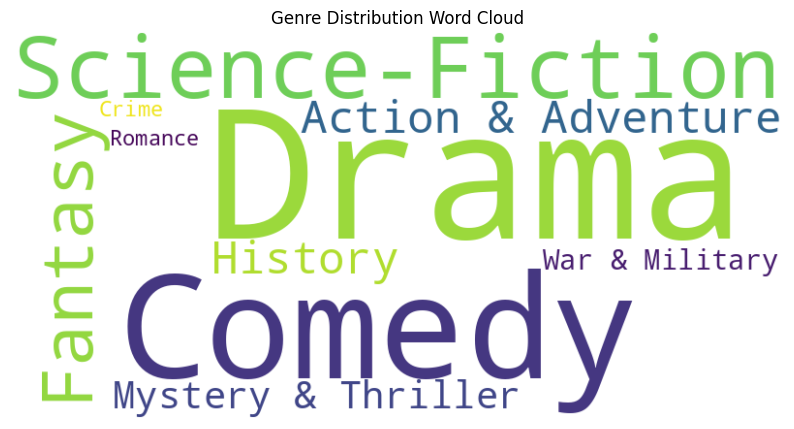

Top 5 genres:
Cleaned Genres
Drama                 5
Comedy                3
Science-Fiction       3
Fantasy               2
Action & Adventure    2
Name: count, dtype: int64


In [ ]:
#Let's Visvalize it using word cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud from the genre counts
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Genre Distribution Word Cloud')
plt.axis('off')
plt.show()

# Identify top N most popular genres
top_n = 5  # Change to the desired number of top genres
top_genres = genre_counts.head(top_n)

print("Top", top_n, "genres:")
print(top_genres)


# **Finding Predominant Streaming Service**

In [ ]:
import pandas as pd

# Assuming merged_filtered_df is your DataFrame

# Concatenate the streaming details from both columns
all_streaming_details = pd.concat([merged_filtered_df['Streaming Details_x'], merged_filtered_df['Streaming Details_y']])

# Flatten the list of streaming details
all_streaming_details = all_streaming_details.explode()

# Count the occurrences of each streaming service
streaming_service_counts = all_streaming_details.value_counts()

# Identify the predominant streaming service
predominant_service = streaming_service_counts.idxmax()
predominant_service_count = streaming_service_counts.max()

print("Predominant Streaming Service:", predominant_service)
print("Number of Titles on Predominant Service:", predominant_service_count)


Predominant Streaming Service: Hotstar
Number of Titles on Predominant Service: 3


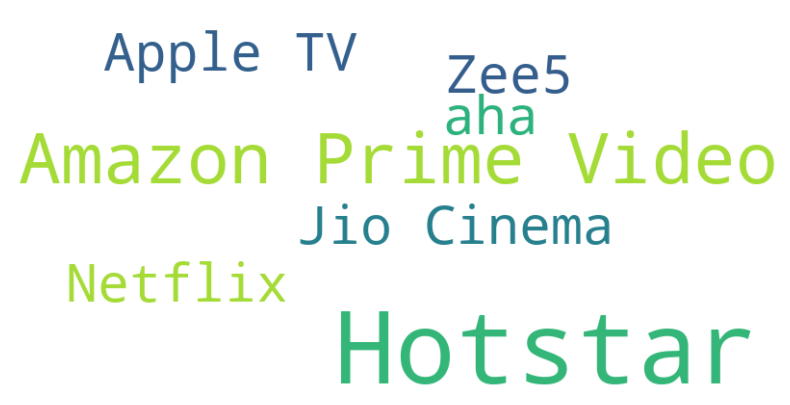

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming merged_filtered_df is your DataFrame
# Concatenate the streaming details from both columns
all_streaming_details = pd.concat([merged_filtered_df['Streaming Details_x'], merged_filtered_df['Streaming Details_y']])

# Flatten the list of streaming details
all_streaming_details = all_streaming_details.explode()

# Count the occurrences of each streaming service
streaming_service_counts = all_streaming_details.value_counts()

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(streaming_service_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# **data export**

In [ ]:
#saving final dataframe as Final Data in csv format
combined_df.to_csv('final_data.csv', index=False)

In [ ]:
#saving filter data as Filter Data in csv format
merged_filtered_df.to_csv('filter_data.csv',index=False)
from google.colab import files

# Assuming merged_filtered_df is your DataFrame and you have saved it to 'filter_data.csv'
merged_filtered_df.to_csv('filter_data.csv', index=False)

# Download the file to your local machine
files.download('filter_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Dataset Drive Link**

In [ ]:
https://drive.google.com/file/d/1nspuWhZiRlFv4v2FdWTT7i2uVv-JNicY/view?usp=sharing